# Linear Regression

En este Notebook aplicaremos el modelo de regresion lineal para predecir el precio del bitcoin en base al sentimiento en twitter en ese instante.

## Imports

In [34]:
import datetime
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import Normalizer, MinMaxScaler

import matplotlib.pylab as plt
%matplotlib inline 

from JABA.utils import DFPicker

### Pick the data

Haremos uso de la funcion **get_complete_df(dateFrom, dateTo)** de **DFPicker** para recopilar los datos de las fechas de las que queremos realizar la observacion

In [2]:
df = DFPicker.get_complete_df(datetime.date(2018, 3, 2),datetime.date(2018, 3, 4))
price = df['Open']
sentiment = df['sentiment']


C:\Users\User\Documents\GitHub\JABA\JABA\utils\DFPicker.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.round_time[i] = datetime.datetime.strptime(time, '%Y-%m-%d %H:%M:%S')


JABA/data/tweets/2018-03-03/sentiment_file_nltk.csv


C:\Users\User\Documents\GitHub\JABA\JABA\utils\DFPicker.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_sentiment_df.round_time[i] = datetime.datetime.strptime(time, '%Y-%m-%d %H:%M:%S')


### Shuffle and split data into training and testing subsets

In [22]:
def train_test(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        Y, 
                                                        test_size = 0.2, 
                                                        random_state = 0)

    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)

    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    
    return X_train, X_test, y_train, y_test

### Remove Outliers

In [32]:
def remove_outliers(data):
    # For each feature find the data points with extreme high or low values
    mios = pd.Series([False])
    mios = mios.repeat(data.shape[0]).reset_index(drop=True)

    for feature in data.keys():

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(data[feature], q=25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(data[feature], q=75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        interquartile_range = Q3 - Q1
        step = 1.5 * interquartile_range

        # Display the outliers
        print("Data points considered outliers for the feature '{}':".format(feature))
        display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
        aux = ~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))
        mios = mios | aux

    # Meaning of ~ character in Python: https://docs.python.org/3/reference/expressions.html#unary-arithmetic-and-bitwise-operations

    # OPTIONAL: Select the indices for data points you wish to remove
    outliers  = []
    outliers = mios
    # Remove the outliers, if any were specified
    good_data = data.drop(data.index[outliers]).reset_index(drop = True)
    
    return good_data

### Model Evaluation

#### 1- Prueba standard de modelos

Training set has 2304 samples.
Testing set has 576 samples.
Linear RMSE: 222.9821100183965
Accuracy Linear: 0.0014478632023293692
R2 Linear: 0.0014478632023293692



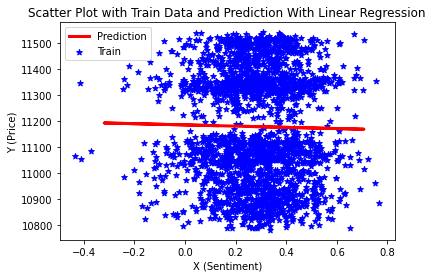

Lasso RMSE: 223.3062980408948
Accuracy Lasso: -0.0014577866340332868
R2 Lasso: -0.0014577866340332868



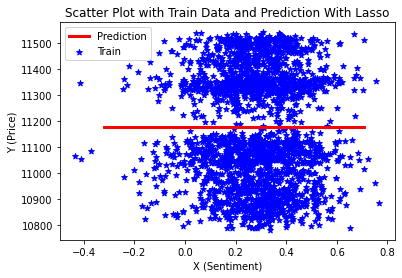

Ridge RMSE: 222.98700793726746
Accuracy Ridge: 0.0014039952788544863
R2 Ridge: 0.0014039952788544863



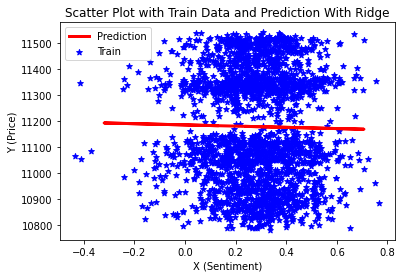

In [6]:
X_train, X_test, y_train, y_test = train_test(sentiment, price)

########  LINEAR REGRESSION  ########      
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear RMSE: {}".format(rmse))
accuracy = model.score(X_test,y_test)
print("Accuracy Linear: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

price_lineal_y_pred = model.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_lineal_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Linear Regression')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()

########  lASSO  ########      
model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model2.score(X_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

price_lasso_y_pred = model2.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_lasso_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Lasso')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()

########  RIDGE  ########      
model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model_ridge.score(X_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")

price_ridge_y_pred = model.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_ridge_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Ridge')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()

#### 2- Normalized Data

Training set has 2304 samples.
Testing set has 576 samples.
Linear RMSE: 0.019973537291793853
Accuracy Linear: 0.001465119556061989
R2 Linear: 0.001465119556061989



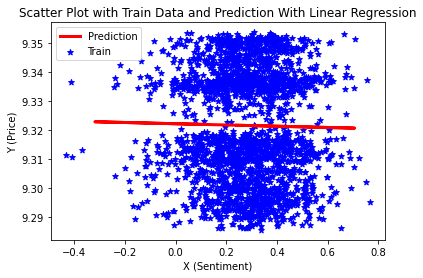

Lasso RMSE: 0.020003239329754157
Accuracy Lasso: -0.001506870095130619
R2 Lasso: -0.001506870095130619



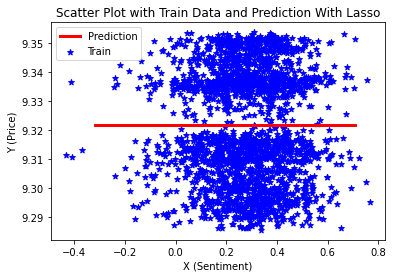

Ridge RMSE: 0.019973985143038782
Accuracy Ridge: 0.001420340296751199
R2 Ridge: 0.001420340296751199



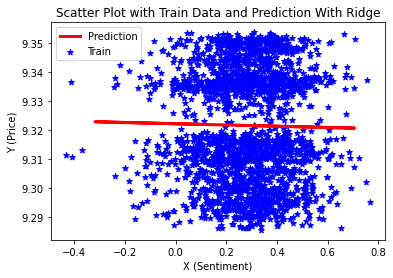

In [25]:
price_normalized = np.log1p(price)

X_train, X_test, y_train, y_test = train_test(sentiment, price_normalized)

########  LINEAR REGRESSION  ########      
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear RMSE: {}".format(rmse))
accuracy = model.score(X_test,y_test)
print("Accuracy Linear: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

price_lineal_y_pred = model.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_lineal_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Linear Regression')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()

########  lASSO  ########      
model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model2.score(X_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

price_lasso_y_pred = model2.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_lasso_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Lasso')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()

########  RIDGE  ########      
model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model_ridge.score(X_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")

price_ridge_y_pred = model.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_ridge_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Ridge')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()


#### 3- Sin outliers y con escalado

Training set has 2304 samples.
Testing set has 576 samples.
Linear RMSE: 0.29083737888637706
Accuracy Linear: 0.001447863202328703
R2 Linear: 0.001447863202328703



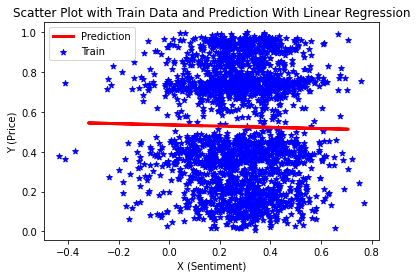

Lasso RMSE: 0.29126021995969004
Accuracy Lasso: -0.001457786634033953
R2 Lasso: -0.001457786634033953



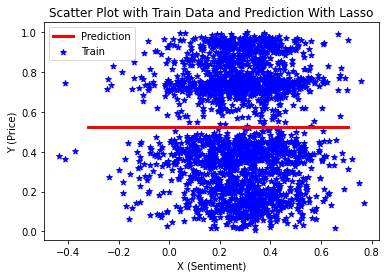

Ridge RMSE: 0.2908437672817794
Accuracy Ridge: 0.001403995278853487
R2 Ridge: 0.001403995278853487



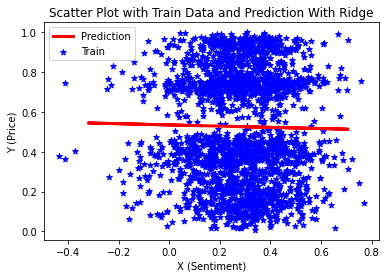

In [42]:
price_reshaped = price.values.reshape(-1,1)
transformer = MinMaxScaler().fit(price_reshaped)
price_scaled = transformer.transform(price_reshaped)

X_train, X_test, y_train, y_test = train_test(sentiment, price_scaled)

########  LINEAR REGRESSION  ########      
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear RMSE: {}".format(rmse))
accuracy = model.score(X_test,y_test)
print("Accuracy Linear: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

price_lineal_y_pred = model.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_lineal_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Linear Regression')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()

########  lASSO  ########      
model2 = Lasso()
model2.fit(X=X_train, y=y_train)
y_pred2 = model2.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model2.score(X_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))
R2_lasso = r2_score(y_test, y_pred2)
print("R2 Lasso: {}".format(R2_lasso))
print("")

price_lasso_y_pred = model2.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_lasso_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Lasso')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()

########  RIDGE  ########      
model_ridge = Ridge()
model_ridge.fit(X=X_train, y=y_train)
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model_ridge.score(X_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")

price_ridge_y_pred = model.predict(X_test)

# Plot
plt.scatter(X_train,y_train,color='blue', marker= '*', label='Train')
plt.plot(X_test, price_ridge_y_pred, color='red', linewidth=3, label='Prediction')

# Decorate
plt.title('Scatter Plot with Train Data and Prediction With Ridge')
plt.xlabel('X (Sentiment)')
plt.ylabel('Y (Price)')
plt.legend(loc='best')
plt.show()
